<a href="https://colab.research.google.com/github/Vijaya0869/BC_detection/blob/main/Breast_Cancer_Detection_using_Digital_Image_Processing_Tecniques_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
!ls  "/content/drive/My Drive/mammography_images/total"

total


In [ ]:
import os
print(len(os.listdir("/content/drive/My Drive/mammography_images")))

4


In [ ]:
train = "/content/drive/My Drive/mammography_images/train" #train dataset images= 5759 (rows,col)=(636,9)
test = "/content/drive/My Drive/mammography_images/test"   #test dataset images= 1918 (212,9)

In [ ]:
print(os.listdir("/content/drive/My Drive/mammography_images/train"))
print(os.listdir("/content/drive/My Drive/mammography_images/test"))

['Image_5233.jpg', 'Image_5277.jpg', 'Image_528.jpg', 'Image_5238.jpg', 'Image_5269.jpg', 'Image_5265.jpg', 'Image_5254.jpg', 'Image_5234.jpg', 'Image_5240.jpg', 'Image_524.jpg', 'Image_5237.jpg', 'Image_5281.jpg', 'Image_5241.jpg', 'Image_5257.jpg', 'Image_5252.jpg', 'Image_5248.jpg', 'Image_5264.jpg', 'Image_5279.jpg', 'Image_5273.jpg', 'Image_5232.jpg', 'Image_525.jpg', 'Image_5260.jpg', 'Image_5278.jpg', 'Image_5262.jpg', 'Image_5245.jpg', 'Image_5312.jpg', 'Image_5330.jpg', 'Image_5284.jpg', 'Image_5293.jpg', 'Image_5316.jpg', 'Image_5324.jpg', 'Image_5287.jpg', 'Image_5291.jpg', 'Image_5299.jpg', 'Image_5321.jpg', 'Image_5304.jpg', 'Image_5296.jpg', 'Image_5302.jpg', 'Image_530.jpg', 'Image_5286.jpg', 'Image_5301.jpg', 'Image_5329.jpg', 'Image_5308.jpg', 'Image_5310.jpg', 'Image_5318.jpg', 'Image_5325.jpg', 'Image_5292.jpg', 'Image_5282.jpg', 'Image_5290.jpg', 'Image_5300.jpg', 'Image_5303.jpg', 'Image_5285.jpg', 'Image_5327.jpg', 'Image_5323.jpg', 'Image_532.jpg', 'Image_5326.jp

In [ ]:
#Size of datasets
import os
print(len(os.listdir("/content/drive/My Drive/mammography_images/train")))
print(len(os.listdir("/content/drive/My Drive/mammography_images/test")))

5759
1918


In [ ]:
from PIL import Image

im = Image.open("/content/mammography_images/train/Image_1.jpg")
im1 = Image.open("/content/mammography_images/test/Image_1.jpg")
width, height = im.size
w1, h1 = im1.size
print("image size in train dataset is : "+str(width) + "x" + str(height))
print("image size in test dataset is : "+str(w1) + "x" + str(h1))

image size in train dataset is : 224x224
image size in test dataset is : 224x224


In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import scipy.misc
import scipy.ndimage
import skimage.filters
import sklearn.metrics

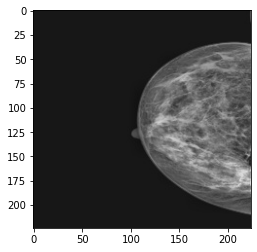

In [ ]:
#Reading the image
img = mpimg.imread("/content/drive/My Drive/mammography_images/total/test/Image_1.jpg")
#Displaying the image
imgplot = plt.imshow(img)

In [ ]:
print(img.shape)

(224, 224, 3)


# Image Preprocessing


The general methods for image pre-processing are divided into various branches such as image 
enhancement, noise removal, image smoothing, enhancement of contrast adaptive mean filter 
to remove noise from image and performs spatial processing .
Input for this stage is a mammogram image which was converted into a grayscale image. 
Median filter is applied to the image to remove the noise from the image

#Median Filter

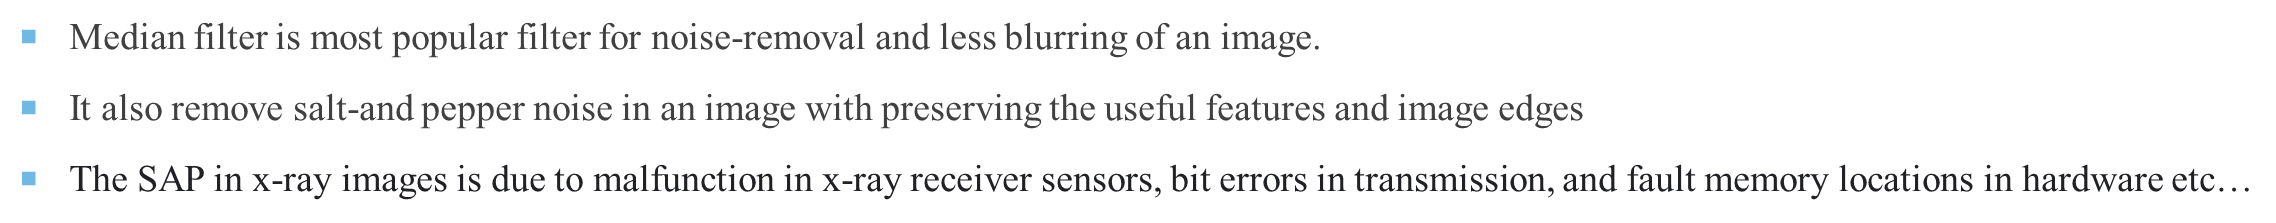

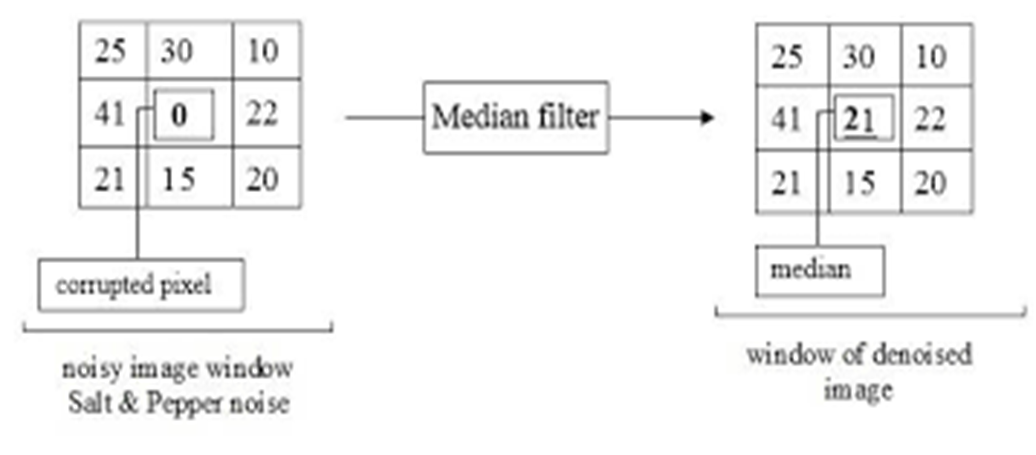

for single image

Text(0.5, 1.0, 'median filtered image')

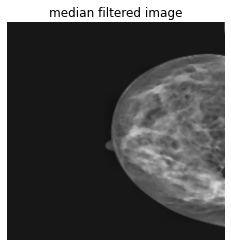

In [ ]:
#for single image

median_filtered = scipy.ndimage.median_filter(img, size=3)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.title("median filtered image")

In [ ]:
#for test dataset

import os
from PIL import Image,ImageFilter
from PIL import Image,ImageEnhance 
f = "/content/mammography_images/test"
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(os.path.join(f_img))
    img = img.filter(ImageFilter.MedianFilter(size = 3))
    img.save(f_img)

In [ ]:
#for train dataset

import os
from PIL import Image,ImageFilter
from PIL import Image,ImageEnhance 
f = "/content/mammography_images/train"
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(os.path.join(f_img))
    img = img.filter(ImageFilter.MedianFilter(size = 3))
    img.save(f_img)

#Image Segmentation

The process of locating edges in an image which will help in understanding image features is 
called edge detection. It is believed that edges consist of meaningful features and contains 
significant information. It reduces the amount of data in an image and preserves the structural 
properties of an image. Edges are the Sudden &Significant changes in the intensity of an image.
Sobel operator is used to detect both horizontal and vertical edges.

#Edge Based Segmentation

What divides two objects in an image? There is always an edge between two adjacent regions with different grayscale values (pixel values). The edges can be considered as the discontinuous local features of an image.

We can make use of this discontinuity to detect edges and hence define a boundary of the object. This helps us in detecting the shapes of multiple objects present in a given image. To detect edges, we will use filters and convolutions. Choosing some specific values for these weight matrices helps us to detect horizontal or vertical edges (or even the combination of horizontal and vertical edges).

One such weight matrix is the sobel operator. It is typically used to detect edges. The sobel operator has two weight matrices – one for detecting horizontal edges and the other for detecting vertical edges.

Sobel filter (horizontal) =

[1 2 1

0 0 0

-1 -2 -1]

Sobel filter (vertical) =

[-1 0 1

-2 0 2

-1 0 1]

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
#For train dataset
import os
from PIL import Image,ImageFilter 
path = "/content/drive/My Drive/mammography_images/train"
copy_to = "/content/drive/My Drive/mammography_images/total/train_seg"
for filename in os.listdir(path):
    img = Image.open(os.path.join(path,filename))
    image = img.convert("L")
    # Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
    image = image.filter(ImageFilter.FIND_EDGES)
    image.save(copy_to+filename)

In [ ]:
#For test dataset
import os
from PIL import Image,ImageFilter 
path = "/content/drive/My Drive/mammography_images/test"
copy_to = "/content/drive/My Drive/mammography_images/total/test_seg"
for filename in os.listdir(path):
    img = Image.open(os.path.join(path,filename))
    image = img.convert("L")
    # Detecting Edges on the Image using the argument ImageFilter.FIND_EDGES
    image = image.filter(ImageFilter.FIND_EDGES)
    image.save(copy_to+filename)

#Feature Extraction 

Feature extraction is a very important process for the overall system performance in the classification of tumors

The features which are implemented here are texture features using GLCM

The Gray Level Co-ocurrence Matrix (GLCM) method is used for extracting Texture features i.e.,dissimilarity ,Correlation, homogeneity, contrast, Angular Second moment, energy

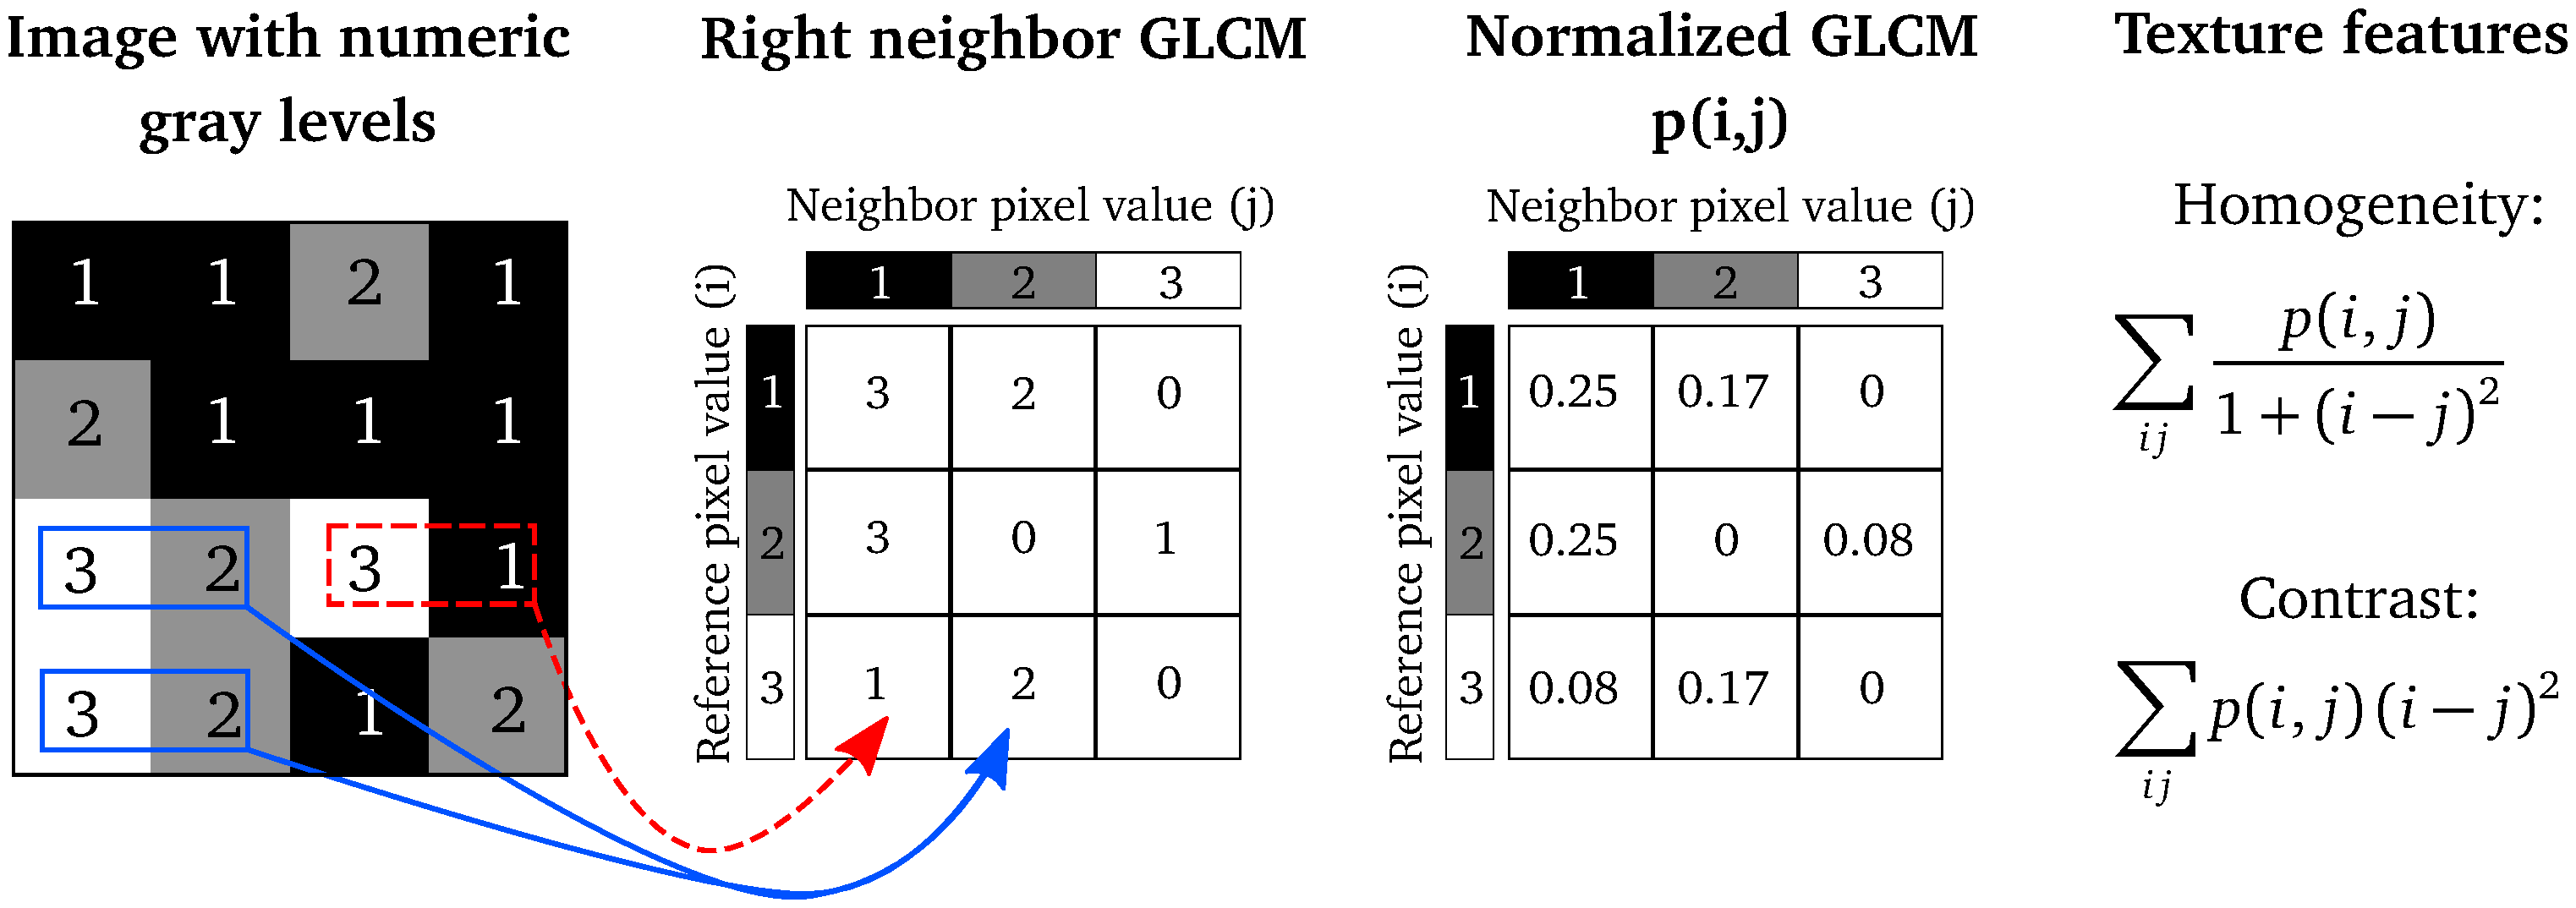

In [ ]:
import numpy as np 
import cv2 
import os
import re #to work with Regular Expressions.
import pandas as pd

# -------------------- Utility function ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder 
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")
        

# -------------------- Load Dataset ------------------------
 
dataset_dir =  "/content/drive/My Drive/mammography_images"

imgs = [] #list image matrix 
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))
            
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            
            #h, w = gray.shape
            #ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            #crop = gray[ymin:ymax, xmin:xmax]
            
            #resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)
            
            imgs.append(gray)
            labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(normalize_desc(folder, sub_folder))
            
            print_progress(i, len_sub_folder, folder, sub_folder, filename)
from skimage.feature import greycomatrix, greycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    
    glcm = greycomatrix(img, 
                        distances=dists, 
                        angles=agls, 
                        levels=lvl,
                        symmetric=sym, 
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in greycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label) 
    
    return feature
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels): 
    glcm_all_agls.append(
            calc_glcm_all_agls(img, 
                                label, 
                                props=properties)
                            )
 
columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)
        
columns.append("image")
#5233  5277


[##########] folder : total/train/ ----> file : Image_1643.jpg


In [ ]:
import pandas as pd

#create the dataframe for GLCM features dataset
glcm_df = pd.DataFrame(glcm_all_agls,
                       columns = columns)
#glcm_df.head(70)

In [ ]:
glcm_df.to_csv("/content/drive/My Drive/mammography_images/total/imp.csv", index=False)